# Klasifikasi Berita TF-IDF dan CBOW

In [56]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [58]:
import pandas as pd
import re
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words("indonesian")

# Load dataset
df = pd.read_csv("berita_antaranews.csv")

print("Jumlah data:", len(df))
print(df.head())

#Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

df["clean_berita"] = df["isi_berita"].astype(str).apply(clean_text)

print("\nContoh hasil preprocessing:")
print(df[["isi_berita", "clean_berita"]].head())


Jumlah data: 50
                                           id_berita  \
0  https://www.antaranews.com/berita/5101501/poli...   
1  https://www.antaranews.com/berita/5101497/ktt-...   
2  https://www.antaranews.com/berita/5101493/komi...   
3  https://www.antaranews.com/berita/5101489/pemp...   
4  https://www.antaranews.com/foto/5101485/truk-t...   

                                        judul_berita  \
0  Polisi: Freeport terus berjuang evakuasi peker...   
1  KTT Sabuk dan Jalur Sutra di Hong Kong eksplor...   
2  Komisi I DPR minta WNI segera dievakuasi dari ...   
3  Pemprov Bali hitung kerugian 474 pedagang pasa...   
4  Truk tangki gas meledak di Meksiko, sekitar 57...   

                                          isi_berita kategori_berita  
0  Timika (ANTARA) - Kepolisian Sektor Tembagapur...       Humaniora  
1  Hong Kong (ANTARA) - Konferensi Tingkat Tinggi...           Dunia  
2  Jakarta (ANTARA) - Anggota Komisi I DPR RI Tau...         Politik  
3  Denpasar (ANTARA) - Pem

[nltk_data] Downloading package stopwords to C:\Users\Syafiq
[nltk_data]     Azizi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
# =========================
# TF-IDF + Naive Bayes
# Dengan filter kelas kecil
# =========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Filter kelas dengan kurang dari 2 contoh ---
df_filtered = df.groupby('kategori_berita').filter(lambda x: len(x) > 1)
print("Distribusi label setelah filter:")
print(df_filtered['kategori_berita'].value_counts())

# --- 2. Split data ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df_filtered['kategori_berita'])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    df_filtered['isi_berita'],
    y_encoded,   # <- pakai angka
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


# --- 3. TF-IDF Vectorization ---
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train_tfidf)
X_test_tfidf = tfidf.transform(X_test_tfidf)

# --- 4. Naive Bayes Classification ---
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_nb_tfidf = nb_model.predict(X_test_tfidf)

# --- Evaluasi Naive Bayes (TF-IDF) ---
acc_nb_tfidf = accuracy_score(y_test_tfidf, y_pred_nb_tfidf)
print("\n=== Evaluasi Naive Bayes ===")
print("Accuracy:", acc_nb_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_test_tfidf, y_pred_nb_tfidf))
print("Classification Report:\n", classification_report(y_test_tfidf, y_pred_nb_tfidf))





Distribusi label setelah filter:
kategori_berita
Humaniora        17
Hukum             9
Tekno             4
Rilis Pers        3
Politik           2
Foto              2
Internasional     2
Bisnis            2
Lintas Kota       2
Name: count, dtype: int64

=== Evaluasi Naive Bayes ===
Accuracy: 0.5555555555555556
Confusion Matrix:
 [[1 1 0 0 0]
 [0 4 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         4
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.30      0.30      0.27         9
weighted avg       0.44      0.56      0.44         9



C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Filter kelas dengan kurang dari 2 contoh ---
df_filtered = df.groupby('kategori_berita').filter(lambda x: len(x) > 1)
print("Distribusi label setelah filter:")
print(df_filtered['kategori_berita'].value_counts())

# --- 2. Split data ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df_filtered['kategori_berita'])

X_train__tfidf, X_test_tfidf, y_train, y_test_tfidf = train_test_split(
    df_filtered['isi_berita'],
    y_encoded,   # <- pakai angka
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


# --- 3. TF-IDF Vectorization ---
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train__tfidf_tfidf = tfidf.fit_transform(X_train__tfidf)
X_test_tfidf = tfidf.transform(X_test_tfidf)
# --- 5. Logistic Regression Classification ---
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train__tfidf_tfidf, y_train_tfidf)
y_pred_lr_tfidf = lr_model.predict(X_test_tfidf)

# --- Evaluasi Logistic Regression (TF-IDF) ---
acc_lr_tfidf = accuracy_score(y_test_tfidf, y_pred_lr_tfidf)
print("\n=== Evaluasi Logistic Regression ===")
print("Accuracy:", acc_lr_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_tfidf))
print("Classification Report:\n", classification_report(y_test_tfidf, y_pred_lr_tfidf))

Distribusi label setelah filter:
kategori_berita
Humaniora        17
Hukum             9
Tekno             4
Rilis Pers        3
Politik           2
Foto              2
Internasional     2
Bisnis            2
Lintas Kota       2
Name: count, dtype: int64

=== Evaluasi Logistic Regression ===
Accuracy: 0.5555555555555556
Confusion Matrix:
 [[1 1 0 0 0]
 [0 4 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         4
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.30      0.30      0.27         9
weighted avg       0.44      0.56      0.44         9



C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [76]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cpu


In [62]:
import nltk
from nltk.tokenize import word_tokenize
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Syafiq
[nltk_data]     Azizi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Syafiq
[nltk_data]     Azizi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [63]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in df_filtered['isi_berita']]

In [64]:
vocab = set(word for doc in tokenized_docs for word in doc)
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}

vocab_size = len(vocab)
embedding_dim = 50
window_size = 2


In [65]:
data = []
for doc in tokenized_docs:
    for i, word in enumerate(doc):
        context = []
        for j in range(i - window_size, i + window_size + 1):
            if j != i and 0 <= j < len(doc):
                context.append(word2idx[doc[j]])
        if context:
            data.append((context, word2idx[word]))

In [66]:
class CBOWDataset(Dataset):
    def __init__(self, tokenized_docs, word_to_idx, context_window=2):
        self.data = []
        self.context_window = context_window
        for doc in tokenized_docs:
            for i, word in enumerate(doc):
                if word not in word_to_idx:
                    continue
                context = []
                for j in range(i - context_window, i + context_window + 1):
                    if j != i and j >= 0 and j < len(doc):
                        if doc[j] in word_to_idx:
                            context.append(word_to_idx[doc[j]])
                if len(context) > 0:
                    self.data.append((context, word_to_idx[word]))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        context, target = self.data[idx]
        max_len = self.context_window * 2   # contoh: 2 kiri + 2 kanan = 4
        # pad with zeros if not enough context
        if len(context) < max_len:
            context = context + [0] * (max_len - len(context))
        else:
            context = context[:max_len]
        return torch.tensor(context), torch.tensor(target)


In [67]:
class CBOWModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOWModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        hidden = torch.mean(embeds, dim=1)  # rata-rata embedding context
        out = self.linear1(hidden)
        out = torch.relu(out)
        out = self.linear2(out)
        return out

In [68]:
doc_embeddings = []
for doc in tokenized_docs:
    idxs = [word2idx[w] for w in doc if w in word2idx]
    if idxs:
        embeddings = model.embeddings(torch.tensor(idxs))
        doc_embedding = embeddings.mean(dim=0).detach().numpy()
        doc_embeddings.append(doc_embedding)
    else:
        doc_embeddings.append(np.zeros(embedding_dim))

X_cbow = np.array(doc_embeddings)

In [78]:
le = LabelEncoder()
y = le.fit_transform(df_filtered['kategori_berita'])

X_train_cbow, X_test_cbow, y_train_cbow, y_test_cbow = train_test_split(
    X_cbow, y, test_size=0.2, random_state=42, stratify=y
)


In [80]:
nb_model = GaussianNB()
nb_model.fit(X_train_cbow, y_train_cbow)
y_pred_nb_cbow = nb_model.predict(X_test_cbow)

print("\n=== CBOW + Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test_cbow, y_pred_nb_cbow))
print("Confusion Matrix:\n", confusion_matrix(y_test_cbow, y_pred_nb_cbow))
print("Classification Report:\n", classification_report(y_test_cbow, y_pred_nb_cbow))


=== CBOW + Naive Bayes ===
Accuracy: 0.5555555555555556
Confusion Matrix:
 [[1 1 0 0 0]
 [0 4 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         4
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.30      0.30      0.27         9
weighted avg       0.44      0.56      0.44         9



C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [79]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_cbow, y_train_cbow)
y_pred_lr_cbow = lr_model.predict(X_test_cbow)

print("\n=== CBOW + Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test_cbow, y_pred_lr_cbow))
print("Confusion Matrix:\n", confusion_matrix(y_test_cbow, y_pred_lr_cbow))
print("Classification Report:\n", classification_report(y_test_cbow, y_pred_lr_cbow))


=== CBOW + Logistic Regression ===
Accuracy: 0.4444444444444444
Confusion Matrix:
 [[0 2 0 0 0]
 [0 4 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.44      1.00      0.62         4
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.44         9
   macro avg       0.09      0.20      0.12         9
weighted avg       0.20      0.44      0.27         9



C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Syafiq Azizi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

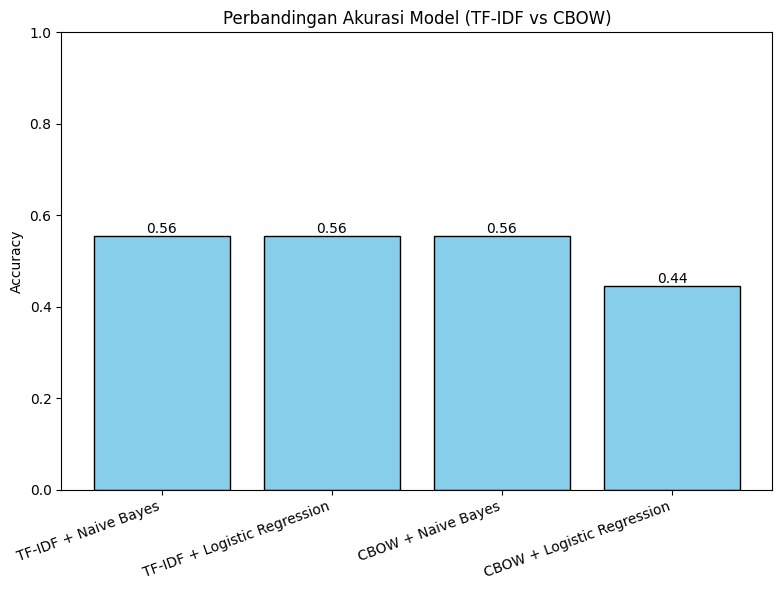

In [82]:
import matplotlib.pyplot as plt

# Setelah TF-IDF
acc_nb_tfidf = accuracy_score(y_test_tfidf, y_pred_nb_tfidf)
acc_lr_tfidf = accuracy_score(y_test_tfidf, y_pred_lr_tfidf)

# Setelah CBOW
acc_nb_cbow = accuracy_score(y_test_cbow, y_pred_nb_cbow)
acc_lr_cbow = accuracy_score(y_test_cbow, y_pred_lr_cbow)


# Data hasil akurasi
models = [
    "TF-IDF + Naive Bayes",
    "TF-IDF + Logistic Regression",
    "CBOW + Naive Bayes",
    "CBOW + Logistic Regression"
]
accuracies = [acc_nb_tfidf, acc_lr_tfidf, acc_nb_cbow, acc_lr_cbow]

# Plot diagram batang
plt.figure(figsize=(8,6))
bars = plt.bar(models, accuracies, color="skyblue", edgecolor="black")

# Tambahkan label angka di atas batang
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{acc:.2f}", ha="center", va="bottom", fontsize=10)

plt.title("Perbandingan Akurasi Model (TF-IDF vs CBOW)")
plt.ylabel("Accuracy")
plt.xticks(rotation=20, ha="right")
plt.ylim(0,1)  # karena akurasi selalu antara 0-1
plt.tight_layout()
plt.show()
